In [1]:
import numpy as np
import pandas as pd
from uncertainties import unumpy, ufloat

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter

In [2]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

params = {'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{helvet}',
                                 r'\usepackage{sansmath}',
                                 r'\sansmath',
                                 r'\sisetup{detect-all}']}
plt.rcParams.update(params)

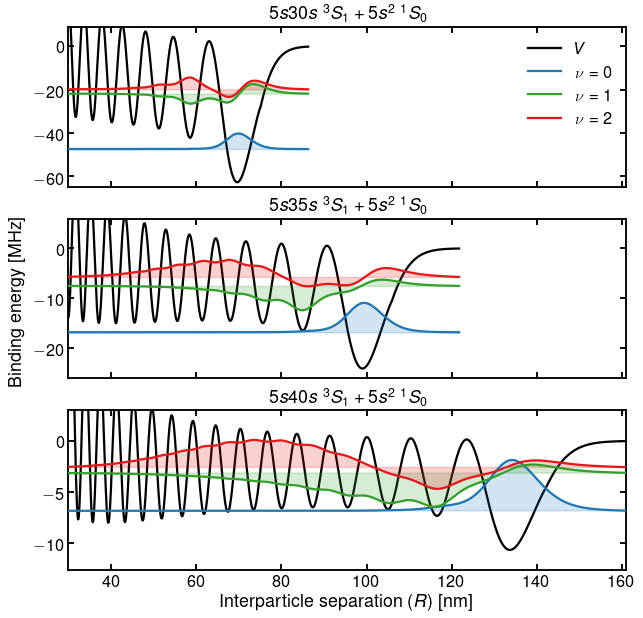

In [71]:
########################################################################

sns.set_context('talk')
cp = sns.color_palette('Paired')

[fig, axs] = plt.subplots(nrows = 3, sharex=True, figsize=(10, 10))


########################################################################
n = 30

pot = pd.read_excel('pot_87Sr_without_ion_atom.xlsx', sheet_name=str(n))
wvf_nu0 = pd.read_excel('wvf_87Sr_without_ion_atom-nu0.xlsx', sheet_name=str(n))
wvf_nu1 = pd.read_excel('wvf_87Sr_without_ion_atom-nu1.xlsx', sheet_name=str(n))
wvf_nu2 = pd.read_excel('wvf_87Sr_without_ion_atom-nu2.xlsx', sheet_name=str(n))

# Potential
axs[0].plot(pot['R (nm)'], pot['Energy shift (MHz)'], color='black', zorder=1, label=r'$V$')

# nu=0
wvf_scale = -7E1
axs[0].plot(wvf_nu0['R (nm)'], wvf_scale*wvf_nu0['R psi(R)']+wvf_nu0['E (MHz)'],
            color=cp[1], zorder=3, label=r'$\nu = 0$')
axs[0].fill_between(wvf_nu0['R (nm)'], wvf_scale*wvf_nu0['R psi(R)']+wvf_nu0['E (MHz)'], wvf_nu0['E (MHz)'],
                    color=cp[1], alpha=0.2, zorder=2)

# nu=1
wvf_scale = 7E1
axs[0].plot(wvf_nu1['R (nm)'], wvf_scale*wvf_nu1['R psi(R)']+wvf_nu1['E (MHz)'],
            color=cp[3], zorder=4, label=r'$\nu = 1$')
axs[0].fill_between(wvf_nu1['R (nm)'], wvf_scale*wvf_nu1['R psi(R)']+wvf_nu1['E (MHz)'], wvf_nu1['E (MHz)'],
                    color=cp[3], alpha=0.2, zorder=2)

# nu=2
wvf_scale = 7E1
axs[0].plot(wvf_nu2['R (nm)'], wvf_scale*wvf_nu2['R psi(R)']+wvf_nu2['E (MHz)'],
            color=cp[5], zorder=5, label=r'$\nu = 2$')
axs[0].fill_between(wvf_nu2['R (nm)'], wvf_scale*wvf_nu2['R psi(R)']+wvf_nu2['E (MHz)'], wvf_nu2['E (MHz)'],
                    color=cp[5], alpha=0.2, zorder=2)

# Some subplot options
title_str = r'$5s{%d}s{\;}^{3}{S}_{1} + 5s^{2}{\;}^{1}{S}_{0}$' % (n)
axs[0].set_title(title_str)
axs[0].set_ylim((min(pot['Energy shift (MHz)'])-2, 9))

########################################################################
n = 35

pot = pd.read_excel('pot_87Sr_without_ion_atom.xlsx', sheet_name=str(n))
wvf_nu0 = pd.read_excel('wvf_87Sr_without_ion_atom-nu0.xlsx', sheet_name=str(n))
wvf_nu1 = pd.read_excel('wvf_87Sr_without_ion_atom-nu1.xlsx', sheet_name=str(n))
wvf_nu2 = pd.read_excel('wvf_87Sr_without_ion_atom-nu2.xlsx', sheet_name=str(n))

# Potential
axs[1].plot(pot['R (nm)'], pot['Energy shift (MHz)'], color='black', zorder=1, label=r'$V$')

# nu=0
wvf_scale = 7E1
axs[1].plot(wvf_nu0['R (nm)'], wvf_scale*wvf_nu0['R psi(R)']+wvf_nu0['E (MHz)'],
            color=cp[1], zorder=3, label=r'$\nu = 0$')
axs[1].fill_between(wvf_nu0['R (nm)'], wvf_scale*wvf_nu0['R psi(R)']+wvf_nu0['E (MHz)'], wvf_nu0['E (MHz)'],
                    color=cp[1], alpha=0.2, zorder=2)

# nu=1
wvf_scale = 7E1
axs[1].plot(wvf_nu1['R (nm)'], wvf_scale*wvf_nu1['R psi(R)']+wvf_nu1['E (MHz)'],
            color=cp[3], zorder=4, label=r'$\nu = 1$')
axs[1].fill_between(wvf_nu1['R (nm)'], wvf_scale*wvf_nu1['R psi(R)']+wvf_nu1['E (MHz)'], wvf_nu1['E (MHz)'],
                    color=cp[3], alpha=0.2, zorder=2)

# nu=2
wvf_scale = -7E1
axs[1].plot(wvf_nu2['R (nm)'], wvf_scale*wvf_nu2['R psi(R)']+wvf_nu2['E (MHz)'],
            color=cp[5], zorder=5, label=r'$\nu = 2$')
axs[1].fill_between(wvf_nu2['R (nm)'], wvf_scale*wvf_nu2['R psi(R)']+wvf_nu2['E (MHz)'], wvf_nu2['E (MHz)'],
                    color=cp[5], alpha=0.2, zorder=2)


# Some subplot options
title_str = r'$5s{%d}s{\;}^{3}{S}_{1} + 5s^{2}{\;}^{1}{S}_{0}$' % (n)
axs[1].set_title(title_str)
axs[1].set_ylim((min(pot['Energy shift (MHz)'])-2, 6))

########################################################################
n = 40

pot = pd.read_excel('pot_87Sr_without_ion_atom.xlsx', sheet_name=str(n))
wvf_nu0 = pd.read_excel('wvf_87Sr_without_ion_atom-nu0.xlsx', sheet_name=str(n))
wvf_nu1 = pd.read_excel('wvf_87Sr_without_ion_atom-nu1.xlsx', sheet_name=str(n))
wvf_nu2 = pd.read_excel('wvf_87Sr_without_ion_atom-nu2.xlsx', sheet_name=str(n))

# Potential
axs[2].plot(pot['R (nm)'], pot['Energy shift (MHz)'], color='black', zorder=1, label=r'$V$')

# nu=0
wvf_scale = -7E1
axs[2].plot(wvf_nu0['R (nm)'], wvf_scale*wvf_nu0['R psi(R)']+wvf_nu0['E (MHz)'],
            color=cp[1], zorder=3, label=r'$\nu = 0$')
axs[2].fill_between(wvf_nu0['R (nm)'], wvf_scale*wvf_nu0['R psi(R)']+wvf_nu0['E (MHz)'], wvf_nu0['E (MHz)'],
                    color=cp[1], alpha=0.2, zorder=2)

# nu=1
wvf_scale = -7E1
axs[2].plot(wvf_nu1['R (nm)'], wvf_scale*wvf_nu1['R psi(R)']+wvf_nu1['E (MHz)'],
            color=cp[3], zorder=4, label=r'$\nu = 1$')
axs[2].fill_between(wvf_nu1['R (nm)'], wvf_scale*wvf_nu1['R psi(R)']+wvf_nu1['E (MHz)'], wvf_nu1['E (MHz)'],
                    color=cp[3], alpha=0.2, zorder=2)

# nu=2
wvf_scale = -7E1
axs[2].plot(wvf_nu2['R (nm)'], wvf_scale*wvf_nu2['R psi(R)']+wvf_nu2['E (MHz)'],
            color=cp[5], zorder=5, label=r'$\nu=2$')
axs[2].fill_between(wvf_nu2['R (nm)'], wvf_scale*wvf_nu2['R psi(R)']+wvf_nu2['E (MHz)'], wvf_nu2['E (MHz)'],
                    color=cp[5], alpha=0.2, zorder=2)

# Some subplot options
title_str = r'$5s{%d}s{\;}^{3}{S}_{1} + 5s^{2}{\;}^{1}{S}_{0}$' % (n)
axs[2].set_title(title_str)
axs[2].set_ylim((min(pot['Energy shift (MHz)'])-2, 3))

########################################################################
# Plot options

plt.xlabel(r'Interparticle separation ($R$) [\si{\nm}]')
#fig.text(0.5, 0.04, 'common X', ha='center')

#plt.ylabel(r'Binding energy [\si{\MHz}]')
fig.text(0.04, 0.5, r'Binding energy [\si{\MHz}]', va='center', rotation='vertical')


for ax in axs:
    ax.tick_params(axis='both', which='both', direction='in', length=6)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    
    ax.set_xlim((30, 161))

# Only show legend on single plot
axs[0].legend(frameon=False)

#fig.subplots_adjust(hspace=0.1)

plt.savefig('ulrrm_wave_functions_vs_n.pdf', bbox_inches='tight', transparent=False)
plt.savefig('ulrrm_wave_functions_vs_n.png', bbox_inches='tight', transparent=True, dpi=1000)

plt.show()